In [1]:
import panel
panel.extension('plotly')
import pandas as pd
import hvplot.pandas as hvplot
import matplotlib.pyplot as plt
import requests
import os
import csv
from pathlib import Path
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation
import numpy as np
import tkinter
from tkinter import *
import talib

In [2]:
load_dotenv()

True

# User Preferences

In [3]:
snp_path = Path('SP_100_Symbol.csv')
tickers = []
with open(snp_path, 'r') as cvsfile: 
    snp_reader = csv.reader(cvsfile, delimiter= ',')
    header = next(snp_reader)   
    
    for column in snp_reader:
        tickers.append(str(column[0]))

In [4]:
snp_tickers = ['AAPL', 'ABBV', 'ABT', 'ACN', 'ADBE', 'AIG', 'ALL', 'AMGN', 'AMT', 'AMZN', 'AXP', 'BA', 'BAC', 'BIIB', 'BK', 'BKNG', 'BLK', 'BMY', 'BRK.B', 'C', 'CAT', 'CHTR', 'CL', 'CMCSA', 'COF', 'COP', 'COST', 'CRM', 'CSCO', 'CVS', 'CVX', 'DD', 'DHR', 'DIS', 'DOW', 'DUK', 'EMR', 'EXC', 'F', 'FB', 'FDX', 'GD', 'GE', 'GILD', 'GM', 'GOOG', 'GOOGL', 'GS', 'HD', 'HON', 'IBM', 'INTC', 'JNJ', 'JPM', 'KHC', 'KMI', 'KO', 'LLY', 'LMT', 'LOW', 'MA', 'MCD', 'MDLZ', 'MDT', 'MET', 'MMM', 'MO', 'MRK', 'MS', 'MSFT', 'NEE', 'NFLX', 'NKE', 'NVDA', 'ORCL', 'OXY', 'PEP', 'PFE', 'PG', 'PM', 'PYPL', 'QCOM', 'RTX', 'SBUX', 'SLB', 'SO', 'SPG', 'T', 'TGT', 'TMO', 'TXN', 'UNH', 'UNP', 'UPS', 'USB', 'V', 'VZ', 'WBA', 'WFC', 'WMT', 'XOM']

window_snp = tkinter.Tk()
window_snp.title("S&P 100 Stocks")
label_snp = tkinter.Label(window_snp, text="Please choose up to 10 stocks from the following list").pack()
window_snp.geometry('700x400')


clicked = StringVar(window_snp)
clicked.set(snp_tickers[0]) # default value

menu = OptionMenu(window_snp, clicked, *snp_tickers)
menu.pack()

stocks_chosen = []
def stock_choice():
    stocks_chosen.append(clicked.get())
    print ("You've selected " + clicked.get())

button = Button(window_snp, text="OK", command=stock_choice)
button.pack()

mainloop()


You've selected AAPL
You've selected BRK.B
You've selected JNJ
You've selected MMM
You've selected V
You've selected XOM


In [5]:
stocks_chosen = list(dict.fromkeys(stocks_chosen))
print(stocks_chosen)

['AAPL', 'BRK.B', 'JNJ', 'MMM', 'V', 'XOM']


In [6]:
weight_preferences = [
    "Equal Weighting", 
    "Choose Your Own Weight"
]

window_weight = tkinter.Tk()
window_weight.title("Weighting")
label_weight = tkinter.Label(window_weight, text="Please choose your weighting preferences").pack()
window_weight.geometry('700x400')


clicked = StringVar(window_weight)
clicked.set(weight_preferences[0]) # default value

menu = OptionMenu(window_weight, clicked, *weight_preferences)
menu.pack()

weight_chosen = []
def weight_choice():
    weight_chosen.append(clicked.get())
    print ("You've selected " + clicked.get())
    
    
    
button = Button(window_weight, text="OK", command=weight_choice)
button.pack()

mainloop()


You've selected Equal Weighting


In [7]:
#Equal Weighting
if clicked.get() == "Equal Weighting":
    sum_weight = len(stocks_chosen)
    equal_weighting = 1 / sum_weight 

    weighting_list = []

    for x in stocks_chosen:
        weighting_list.append(equal_weighting)
        if x == stocks_chosen[-1]: 
            print(weighting_list)

            
#Custom Weighting
else:
    root = tkinter.Tk()
    root.title("Custom Weight")
    root.geometry("800x900")


    my_entries = []
    def weight_custom():
        global entry_list 
        entry_list = ''

        for entries in my_entries:
            entry_list = (entry_list) + str(entries.get()) + ","
            my_label.config(text="Your Weighting: " + "\n" + entry_list)

            if entries == my_entries[-1]:
                print("You've decided to weight your stocks as:" "\n" + entry_list[:-1])



    for x in range(len(stocks_chosen)):
        my_entry = Entry(root)
        my_entry.grid(row=x, column = 5, pady=20, padx=5)
        my_entries.append(my_entry)
        
        label2 = Label(root, text = stocks_chosen[x])
        label2.grid(row = x, column=3, pady=20, padx=5)
    

    my_button = Button(root, text = "Done", command = weight_custom)
    my_button.grid(row=15, column=5, pady=20)

    my_label = Label(root, text='Please put your custom weights percentage in decimal places up to 1.00')
    my_label.grid(row=38, column=5, pady=20)
    my_label.pack

    root.mainloop()


[0.16666666666666666, 0.16666666666666666, 0.16666666666666666, 0.16666666666666666, 0.16666666666666666, 0.16666666666666666]


In [8]:
if clicked.get() == "Equal Weighting":
    print(weighting_list)

else:

    entry_listing = entry_list.split(",")[:-1]
    custom_list = [float(x) for x in entry_listing]
#     print(custom_list)

[0.16666666666666666, 0.16666666666666666, 0.16666666666666666, 0.16666666666666666, 0.16666666666666666, 0.16666666666666666]


In [9]:
threshold_window = tkinter.Tk()
threshold_window.title("Risk Assessment & Rebalancing Criteria")
threshold_label_1 = tkinter.Label(threshold_window, text="Please let us know how risk averse you are:")

risk_level = [
    "Low Risk",
    "Medium Risk",
    "High Risk",
    "Extreme Risk",
]

threshold_clicked = StringVar()
threshold_clicked.set(risk_level[0]) # default value
threshold_menu = OptionMenu(threshold_window, threshold_clicked, *risk_level)

threshold_label_1.grid(row=0, column=0)
threshold_menu.grid(row=0, column=1)


def risk_choice():
    chosen_risk = (threshold_clicked.get())
    return chosen_risk
    
threshold_button_1 = tkinter.Button(threshold_window, text="Select level of risk", command=risk_choice)
threshold_button_1.grid(row=1, column=0)

threshold_window.mainloop()

In [10]:
chosen_risk_level = risk_choice()
print ("You've selected " + chosen_risk_level)

You've selected Medium Risk


# Import API's/Data Sets 

In [11]:
alpaca_api_key = os.getenv("alpaca_api_key")
alpaca_secret_key = os.getenv("alpaca_secret_key")

# Create the Alpaca API object
api = tradeapi.REST(
alpaca_api_key,
    alpaca_secret_key,
    api_version="v2"
)

## Load Data

In [12]:
# Format current date as ISO format
start_date = pd.Timestamp("2015-01-01", tz="America/New_York").isoformat()
end_date = pd.Timestamp("2019-12-31", tz="America/New_York").isoformat()

# Set the tickers
tickers = []
tickers.extend(stocks_chosen)

# Set timeframe to '1D' for Alpaca API
timeframe = "1D"

# Get current closing prices for SPY and AGG
portfolio_df = api.get_barset(
    tickers,
    timeframe,
    start = start_date,
    end = end_date
).df

portfolio_df_closing_prices = pd.DataFrame()

for ticker in tickers:
    portfolio_df_closing_prices[ticker] = portfolio_df[ticker]["close"]

portfolio_df_closing_prices.index = portfolio_df_closing_prices.index.date
# portfolio_df_closing_prices.head()

In [13]:
start_date = pd.Timestamp("2015-01-01", tz="America/New_York").isoformat()
end_date = pd.Timestamp("2019-12-31", tz="America/New_York").isoformat()

# Set the tickers
tickers = ['AAPL', 'ABBV', 'ABT', 'ACN', 'ADBE', 'AIG', 'ALL', 'AMGN', 'AMT', 'AMZN', 'AXP', 'BA', 'BAC', 'BIIB', 'BK', 'BKNG', 'BLK', 'BMY', 'BRK.B', 'C', 'CAT', 'CHTR', 'CL', 'CMCSA', 'COF', 'COP', 'COST', 'CRM', 'CSCO', 'CVS', 'CVX', 'DD', 'DHR', 'DIS', 'DOW', 'DUK', 'EMR', 'EXC', 'F', 'FB', 'FDX', 'GD', 'GE', 'GILD', 'GM', 'GOOG', 'GOOGL', 'GS', 'HD', 'HON', 'IBM', 'INTC', 'JNJ', 'JPM', 'KHC', 'KMI', 'KO', 'LLY', 'LMT', 'LOW', 'MA', 'MCD', 'MDLZ', 'MDT', 'MET', 'MMM', 'MO', 'MRK', 'MS', 'MSFT', 'NEE', 'NFLX', 'NKE', 'NVDA', 'ORCL', 'OXY', 'PEP', 'PFE', 'PG', 'PM', 'PYPL', 'QCOM', 'RTX', 'SBUX', 'SLB', 'SO', 'SPG', 'T', 'TGT', 'TMO', 'TXN', 'UNH', 'UNP', 'UPS', 'USB', 'V', 'VZ', 'WBA', 'WFC', 'WMT', 'XOM']

# Set timeframe to '1D' for Alpaca API
timeframe = "1D"

# Get current closing prices for SPY and AGG
snp_df = api.get_barset(
    tickers,
    timeframe,
    start = start_date,
    end = end_date
).df


snp_df_closing_prices = pd.DataFrame()

for ticker in tickers:
    snp_df_closing_prices[ticker] = snp_df[ticker]["close"]

snp_df_closing_prices.index = snp_df_closing_prices.index.date
# snp_df_closing_prices.head()

# Analysis

### Portfolio Analysis

In [14]:
daily_portfolio_returns = portfolio_df_closing_prices.pct_change().dropna()
# daily_portfolio_returns.hvplot(width=1000)

In [15]:
daily_portfolio_std = daily_portfolio_returns.std()
# daily_portfolio_std.hvplot.bar()

In [16]:
portolio_volatility = daily_portfolio_std * np.sqrt(1260)
portolio_volatility.sort_values(inplace=True)
# portolio_volatility.hvplot.bar()

In [17]:
daily_portfolio_cumulative_returns = (1+daily_portfolio_returns).cumprod()
# daily_portfolio_cumulative_returns.hvplot()

In [18]:
#calculating holding period return
beg_prices =portfolio_df_closing_prices.iloc[0]
end_prices = portfolio_df_closing_prices.iloc[-1]

holding_prices = pd.concat([beg_prices, end_prices], axis = 1, join="outer")
holding_prices = holding_prices.transpose()

holding_period_return = holding_prices.pct_change().dropna()
# holding_period_return.hvplot.bar()

In [19]:
#correlation 
portfolio_correlation = daily_portfolio_returns.corr()
# portfolio_correlation.hvplot.heatmap()

In [20]:
## Evaluating Reward-to-risk (Sharpe Ratio) of each stock
portfolio_sharpe_ratios = (daily_portfolio_returns.mean() * 1260) / portolio_volatility
portfolio_sharpe_ratios.sort_values(inplace=True)
# portfolio_sharpe_ratios.hvplot.bar()

### Portfolio Monte Carlo

In [21]:
if clicked.get() == "Equal Weighting":
    monte_carlo_weight = weighting_list
    print(monte_carlo_weight)
else: 
    monte_carlo_weight = custom_list
    print(monte_carlo_weight)

[0.16666666666666666, 0.16666666666666666, 0.16666666666666666, 0.16666666666666666, 0.16666666666666666, 0.16666666666666666]


In [22]:
MC_dist = MCSimulation(
    portfolio_data = portfolio_df,
    weights = monte_carlo_weight,
    num_simulation = 100,
    num_trading_days = 252*5
)

MC_dist.portfolio_data.head()

AAPL                                     \
                             open    high      low   close    volume   
time                                                                   
2015-01-02 00:00:00-05:00  111.39  111.44  107.350  109.30  47045497   
2015-01-05 00:00:00-05:00  108.29  108.65  105.410  106.25  50146623   
2015-01-06 00:00:00-05:00  106.56  107.43  104.630  106.23  59441540   
2015-01-07 00:00:00-05:00  107.20  108.20  106.695  107.75  34452408   
2015-01-08 00:00:00-05:00  109.23  112.15  108.700  111.87  50255019   

                                         BRK.B                             \
                          daily_return    open      high      low   close   
time                                                                        
2015-01-02 00:00:00-05:00          NaN  151.50  151.6000  148.500  149.13   
2015-01-05 00:00:00-05:00    -0.027905  148.81  149.0000  146.780  147.07   
2015-01-06 00:00:00-05:00    -0.000188  147.64  148.5300  146.111  146.70   
2015-01-07 00:00:00-05:00     0.014309  147.94  149.1399  147.650  148.81   
2015-01-08 00:00:00-05:00     0.038237  150.60  151.3300  150.510  151.25   

                           ...       V                                  XOM  \
                           ...     low   close   volume daily_return   open   
time                       ...                                                
2015-01-02 00:00:00-05:00  ...  65.623  66.220  5808460          NaN  92.25   
2015-01-05 00:00:00-05:00  ...  64.716  64.888  8041820    -0.020115  92.10   
2015-01-06 00:00:00-05:00  ...  63.714  64.313  8805872    -0.008861  90.24   
2015-01-07 00:00:00-05:00  ...  16.220  65.205  7659016     0.013870  90.65   
2015-01-08 00:00:00-05:00  ...  16.499  65.968  6732752     0.011702  91.25   

                                                                       
                            high    low  close    volume daily_return  
time                                                                   
2015-01-02 00:00:00-05:00  93.05  91.81  92.81   8095896          NaN  
2015-01-05 00:00:00-05:00  92.40  89.50  90.34  15352301    -0.026614  
2015-01-06 00:00:00-05:00  91.41  89.02  89.78  14520520    -0.006199  
2015-01-07 00:00:00-05:00  91.48  90.00  90.72  11160530     0.010470  
2015-01-08 00:00:00-05:00  92.27  91.00  92.20  11353986     0.016314  

[5 rows x 36 columns]

In [23]:
MC_dist.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.


0         1         2         3         4         5         6   \
0     1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
1     1.020171  1.000061  1.012383  0.986230  1.028098  0.980683  0.987768   
2     1.055465  1.000100  1.013338  0.999229  1.033652  1.002304  0.987626   
3     1.060831  1.015024  0.988165  0.986157  1.029112  1.000387  0.965297   
4     1.046912  0.980565  0.999947  0.980554  1.032919  1.002131  0.967910   
5     1.019796  1.002230  0.985783  0.989333  1.021343  1.001051  0.960096   
6     0.993834  0.991181  0.992836  1.018945  1.011013  1.008325  0.961676   
7     0.989314  0.986270  1.014543  1.033558  1.006345  1.013652  0.947711   
8     0.947062  0.965588  1.027719  1.045844  1.028478  1.021805  0.964446   
9     0.950890  0.956486  1.029314  1.060600  1.032230  1.021337  0.978005   
10    0.963009  0.920043  0.994104  1.070739  1.050851  1.044673  0.988068   
11    0.957207  0.942896  0.975445  1.091643  1.051177  1.060637  0.993532   
12    0.950651  0.936586  0.974129  1.086374  1.039193  1.072087  0.981389   
13    0.925749  0.929010  1.003899  1.115115  1.056106  1.089190  1.006568   
14    0.909006  0.933000  1.017962  1.106159  1.066997  1.074957  1.020755   
15    0.912871  0.913674  1.038534  1.129717  1.081842  1.068491  1.044041   
16    0.936154  0.932972  1.033106  1.123274  1.075620  1.083385  1.021699   
17    0.966213  0.927613  1.032510  1.121657  1.082951  1.086535  1.029695   
18    0.967317  0.949903  1.031955  1.121041  1.098039  1.095215  1.019323   
19    0.951767  0.947786  1.053745  1.129988  1.113030  1.081132  1.018809   
20    0.973582  0.939860  1.026636  1.122369  1.101481  1.107257  1.022228   
21    0.974985  0.943388  1.038995  1.159845  1.099125  1.113371  1.012124   
22    0.985531  0.956144  1.041503  1.169514  1.121333  1.107066  1.007717   
23    1.001691  0.965036  1.012757  1.168762  1.142922  1.113459  1.015320   
24    1.009161  0.951933  1.033119  1.169262  1.117506  1.107803  0.993456   
25    1.000551  0.962450  1.038807  1.180078  1.134840  1.130097  1.023499   
26    1.004542  0.948542  1.019429  1.193624  1.140103  1.132781  1.012731   
27    1.021816  0.954729  1.009555  1.189028  1.171404  1.131962  1.007622   
28    0.996930  0.945488  1.009442  1.219547  1.198949  1.127961  0.998276   
29    0.994338  0.952156  1.012285  1.198640  1.205219  1.157180  1.023063   
...        ...       ...       ...       ...       ...       ...       ...   
1231  3.635803  0.954384  2.270869  3.442564  4.910276  1.730947  4.012267   
1232  3.706401  0.950606  2.282037  3.540324  4.971077  1.731901  4.100384   
1233  3.664832  0.962272  2.242025  3.568756  4.952977  1.743887  4.085049   
1234  3.710735  0.972449  2.243326  3.621080  5.010490  1.773859  4.146192   
1235  3.821148  0.965646  2.241354  3.627274  5.046665  1.779324  4.085360   
1236  3.823829  0.973446  2.228145  3.615296  4.907302  1.850740  4.115351   
1237  3.884721  0.989852  2.172343  3.668875  4.923740  1.855836  4.064375   
1238  3.921269  0.968244  2.156419  3.599621  4.935558  1.849481  4.107296   
1239  3.954999  0.968945  2.134674  3.509498  5.045776  1.828752  4.189809   
1240  3.925070  0.967688  2.084983  3.402850  5.207869  1.844218  4.193495   
1241  4.021166  0.979739  2.096731  3.325151  5.026424  1.852540  4.226315   
1242  3.967118  0.964219  2.150152  3.384312  5.004844  1.869919  4.224374   
1243  4.015149  0.961238  2.197297  3.422977  4.967903  1.857323  4.309003   
1244  4.151697  0.937368  2.212400  3.445056  5.027183  1.829896  4.344911   
1245  4.221307  0.919002  2.232741  3.515023  5.004801  1.808500  4.293957   
1246  4.227124  0.907220  2.209114  3.551039  5.017090  1.820413  4.256504   
1247  4.336420  0.925512  2.168960  3.585106  4.927725  1.829384  4.231591   
1248  4.380278  0.951386  2.180832  3.599137  4.889595  1.828751  4.203770   
1249  4.209425  0.965791  2.202351  3.650163  4.849114  1.779804  4.090984   
1250  4.121853  0.983303  2.207450

In [24]:
even_tbl = MC_dist.summarize_cumulative_return()

print(even_tbl)

count           100.000000
mean              2.471530
std               1.536463
min               0.430721
25%               1.361145
50%               2.085837
75%               3.012750
max               9.719240
95% CI Lower      0.601375
95% CI Upper      6.089777
Name: 1260, dtype: float64


In [25]:
even_ci_lower = round(even_tbl[8]*1000,2)
even_ci_upper = round(even_tbl[9]*1000,2)

print(f"There is a 95% chance that an initial investment of $1,000 in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${even_ci_lower} and ${even_ci_upper}.")

There is a 95% chance that an initial investment of $1,000 in the portfolio over the next 5 years will end within in the range of $601.38 and $6089.78.


<AxesSubplot:title={'center':'100 Simulations of Cumulative Portfolio Return Trajectories Over the Next 1260 Trading Days.'}>

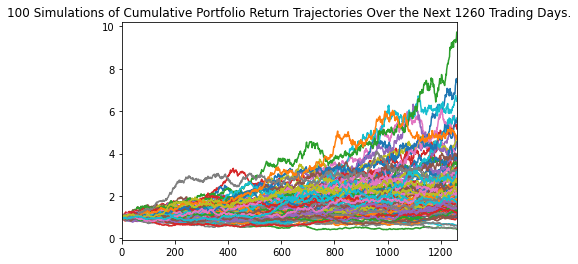

In [26]:
MC_line_plot = MC_dist.plot_simulation()
MC_line_plot

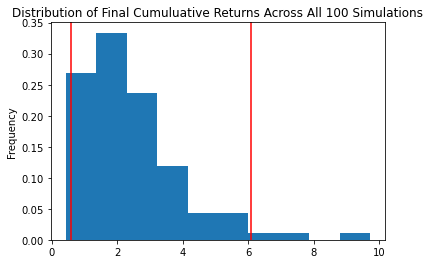

In [27]:
MC_dist_plot = MC_dist.plot_distribution()

### SNP 100 Analysis 

In [28]:
snp_daily_returns = snp_df_closing_prices.pct_change()
# snp_daily_returns.hvplot(width=1200)

In [29]:
snp_std = snp_daily_returns.std()
# snp_std.hvplot.bar(rot=90, width=1500)

In [30]:
snp_volatility_annualized = snp_std * np.sqrt(1260)
# snp_volatility_annualized.set_index(['tickers'], inplace=True)
# snp_volatility_annualized.hvplot.bar(rot=90,width=1500)
# for i in range(len(snp_volatility_annualized)):
#     print(snp_volatility_annualized.iloc[i,0])
# for i in snp_volatility_annualized.index:
#     print(i.value)

In [31]:
# snp_volatility_annualized.describe()

In [32]:
snp_cum_returns = (1+snp_daily_returns).cumprod()
# snp_cum_returns.hvplot(height=1000, width=1500)

In [33]:
snp_correlation = snp_daily_returns.corr()
# snp_correlation.hvplot(width=1500, rot=90)

In [34]:
# snp_correlation.describe()

In [35]:
snp_sharpe_ratios=(snp_daily_returns.mean() * 1260) / snp_volatility_annualized
snp_sharpe_ratios = snp_sharpe_ratios.to_frame().reset_index()
snp_sharpe_ratios.rename(columns={0:'Sharpe Ratios', 'index':'tickers'}, inplace=True)
# snp_sharpe_ratios.hvplot.bar(width=1500, rot=90)
#snp_sharpe_ratios.set_index(['tickers'], inplace=True)
#snp_sharpe_ratios.head()
# for i in range(len(snp_sharpe_ratios)):
#     print(snp_sharpe_ratios.iloc[i,0])
# snp_sharpe_ratios.loc['AAPL']

### Valuation

In [36]:
Valuation1_path = Path("CSVs/First_Ten_Stocks_Valuation.csv")
Valuation2_path = Path("CSVs/Second_Ten_Stocks_Valuation.csv")
Valuation3_path = Path("CSVs/Third_Ten_Stocks_Valuation.csv")
Valuation4_path = Path("CSVs/Fourth_Ten_Stocks_Valuation.csv")
Valuation5_path = Path("CSVs/Fifth_Ten_Stocks_Valuation.csv")
Valuation6_path = Path("CSVs/Sixth_Ten_Stocks_Valuation.csv")
Valuation7_path = Path("CSVs/Seventh_Ten_Stocks_Valuation.csv")
Valuation8_path = Path("CSVs/Eighth_Ten_Stocks_Valuation.csv")
Valuation9_path = Path("CSVs/Ninth_Ten_Stocks_Valuation.csv")
Valuation10_path = Path("CSVs/Tenth_Ten_Stocks_Valuation.csv")
#with open(Valuation1_path, 'r') as cvsfile1:
Valuation1_data = pd.read_csv(Valuation1_path, delimiter= ',').drop(columns="adate").rename(columns={
    "qdate": "quote date",
    "pe_exi": "Price/Diluted EPS",
    "ps": "Price/Sales",
    "ptb": "Price/Book"
})
Valuation2_data = pd.read_csv(Valuation2_path, delimiter= ',').drop(columns="adate").rename(columns={
    "qdate": "quote date",
    "pe_exi": "Price/Diluted EPS",
    "ps": "Price/Sales",
    "ptb": "Price/Book"
})
Valuation3_data = pd.read_csv(Valuation3_path, delimiter= ',').drop(columns="adate").rename(columns={
    "qdate": "quote date",
    "pe_exi": "Price/Diluted EPS",
    "ps": "Price/Sales",
    "ptb": "Price/Book"
})
Valuation4_data = pd.read_csv(Valuation4_path, delimiter= ',').drop(columns="adate").rename(columns={
    "qdate": "quote date",
    "pe_exi": "Price/Diluted EPS",
    "ps": "Price/Sales",
    "ptb": "Price/Book"
})
Valuation5_data = pd.read_csv(Valuation5_path, delimiter= ',').drop(columns="adate").rename(columns={
    "qdate": "quote date",
    "pe_exi": "Price/Diluted EPS",
    "ps": "Price/Sales",
    "ptb": "Price/Book"
})
Valuation6_data = pd.read_csv(Valuation6_path, delimiter= ',').drop(columns="adate").rename(columns={
    "qdate": "quote date",
    "pe_exi": "Price/Diluted EPS",
    "ps": "Price/Sales",
    "ptb": "Price/Book"
})
Valuation7_data = pd.read_csv(Valuation7_path, delimiter= ',').drop(columns="adate").rename(columns={
    "qdate": "quote date",
    "pe_exi": "Price/Diluted EPS",
    "ps": "Price/Sales",
    "ptb": "Price/Book"
})
Valuation8_data = pd.read_csv(Valuation8_path, delimiter= ',').drop(columns="adate").rename(columns={
    "qdate": "quote date",
    "pe_exi": "Price/Diluted EPS",
    "ps": "Price/Sales",
    "ptb": "Price/Book"
})
Valuation9_data = pd.read_csv(Valuation9_path, delimiter= ',').drop(columns="adate").rename(columns={
    "qdate": "quote date",
    "pe_exi": "Price/Diluted EPS",
    "ps": "Price/Sales",
    "ptb": "Price/Book"
})
Valuation10_data = pd.read_csv(Valuation10_path, delimiter= ',').drop(columns="adate").rename(columns={
    "qdate": "quote date",
    "pe_exi": "Price/Diluted EPS",
    "ps": "Price/Sales",
    "ptb": "Price/Book"
})
allvaluationdata = [Valuation1_data,Valuation2_data,Valuation3_data,Valuation4_data,Valuation5_data,Valuation6_data,Valuation7_data,Valuation8_data,Valuation9_data,Valuation10_data]
alldata_df = pd.concat(allvaluationdata)

In [37]:
allvaluationdata = [Valuation1_data,Valuation2_data,Valuation3_data,Valuation4_data,Valuation5_data,Valuation6_data,Valuation7_data,Valuation8_data,Valuation9_data,Valuation10_data]
alldata_df = pd.concat(allvaluationdata)
Valuation_data_mean = alldata_df.groupby(["TICKER"]).mean() 
plotdata = alldata_df[["public_date","Price/Diluted EPS","Price/Sales","Price/Book","TICKER"]].groupby(["public_date","TICKER"]).mean()

def user_stock_valuation_metric(ticker):
    users_stock_valuation_metric = alldata_df.loc[alldata_df["TICKER"] == 'AAPL'].copy()
    #FIRST STEP, SELECT A TICKER
    
    users_stock_valuation_metric["Price/Diluted EPS Mean"] = Valuation_data_mean.loc[ticker]["Price/Diluted EPS"]  
    users_stock_valuation_metric["Price/Sales Mean"] = Valuation_data_mean.loc[ticker]["Price/Sales"]
    users_stock_valuation_metric["Price/Book Mean"] = Valuation_data_mean.loc[ticker]["Price/Book"]
    #adding a column of metric Mean (so this column repeats a single value, the mean) to users_stock_valuation_metric
    
    users_stock_valuation_PE_plot = users_stock_valuation_metric.hvplot.bar(  
    x = 'public_date',
    y = 'Price/Diluted EPS', 
    xlabel='Date',
    ylabel='P/E',
    label= 'Monthly Values',
    title = f'Historical Price/Diluted EPS vs. Mean for {ticker}',
    height = 500,
    width = 1000,
    rot = 90,
    color = 'blue'   
    )
    #so the y-values are the monthly figures
    #the above plot displays the monthly metric for the stock selected
    
    mean_per = users_stock_valuation_metric.hvplot.line(  
    x = 'public_date',
    y = 'Price/Diluted EPS Mean',  #so the y-values is one horizontal line representing the mean of the metric
    xlabel='Date',
    ylabel='Mean P/E',
    label= 'Mean Value',
    height=500,
    width=1000,
    rot = 90,
    color = 'red'
    )
    combined_plot_PE = users_stock_valuation_PE_plot * mean_per
    
    
    
    users_stock_valuation_PS_plot = users_stock_valuation_metric.hvplot.bar(  
    x = 'public_date',
    y = 'Price/Sales', 
    xlabel='Date',
    ylabel='P/S',
    label= 'Monthly Values',
    title = f'Historical Price/Sales vs. Mean for {ticker}',
    height = 500,
    width = 1000,
    rot = 90,
    color = 'blue'   
    )
        
    mean_ps = users_stock_valuation_metric.hvplot.line(  
    x = 'public_date',
    y = 'Price/Sales Mean',  #so the y-values is one horizontal line representing the mean of the metric
    xlabel='Date',
    ylabel='Mean P/S',
    label= 'Mean Value',
    height=500,
    width=1000,
    rot = 90,
    color = 'red'
    )
    combined_plot_PS = users_stock_valuation_PS_plot * mean_ps 
    
    
    users_stock_valuation_PB_plot = users_stock_valuation_metric.hvplot.bar(  
    x = 'public_date',
    y = 'Price/Book', 
    xlabel='Date',
    ylabel='P/B',
    label= 'Monthly Values',
    title = f'Historical Price/Book vs. Mean for {ticker}',
    height = 500,
    width = 1000,
    rot = 90,
    color = 'blue'   
    )
        
    mean_pb = users_stock_valuation_metric.hvplot.line(  
    x = 'public_date',
    y = 'Price/Book Mean',  #so the y-values is one horizontal line representing the mean of the metric
    xlabel='Date',
    ylabel='Mean P/B',
    label= 'Mean Value',
    height=500,
    width=1000,
    rot = 90,
    color = 'red'
    )
    combined_plot_PB = users_stock_valuation_PB_plot * mean_pb 
    
    return combined_plot_PE, combined_plot_PS, combined_plot_PB  
    #return users_stock_valuation_metric
 
PE, PS, PB = user_stock_valuation_metric("AAPL")
# PB + PS + PE


# Algorithmic Strategies

In [38]:
def sma_200(ticker):
    ticker = 'AAPL'
    sma_200 = talib.SMA(portfolio_df_closing_prices[ticker]. values, 200)
    fig = plt.figure(figsize=(7,5))
    plt.plot(sma_200, label=f"Simple Moving Average: {ticker}")
    plt.plot(portfolio_df_closing_prices[ticker].values, label='Daily Price')
    plt.legend(loc='best')
    plt.close()
    return panel.pane.Matplotlib(fig)

In [39]:
# sma_200(ticker)

In [40]:
rolling_avg_50 = portfolio_df_closing_prices.rolling(window=50).mean()
rolling_avg_100 = portfolio_df_closing_prices.rolling(window=100).mean()
sma50 = talib.SMA(portfolio_df_closing_prices[ticker].values, 50)
sma100 = talib.SMA(portfolio_df_closing_prices[ticker].values, 100)
sma_diff = (sma50 - sma100)/sma50

rolling_avg_50.dropna(inplace=True)
rolling_avg_100.dropna(inplace=True)

for ticker in rolling_avg_50:
    rolling_avg_50.rename(columns={ticker: ticker+" 50"}, inplace=True)
for ticker in rolling_avg_100:
    rolling_avg_100.rename(columns={ticker: ticker+" 100"}, inplace=True)

rolling_avg_only_df = pd.concat([rolling_avg_50, rolling_avg_100], axis=1, join='outer', sort=True).dropna()
rolling_avg_df = pd.concat([portfolio_df_closing_prices, rolling_avg_50, rolling_avg_100], axis=1, join='inner')

df_rolling_events = rolling_avg_only_df[['AAPL 50', 'AAPL 100']].copy()
df_rolling_events['Diff'] = rolling_avg_only_df['AAPL 50'] - rolling_avg_only_df['AAPL 100']
df_rolling_events['Signal'] = np.where(rolling_avg_only_df['AAPL 50'] > rolling_avg_only_df['AAPL 100'], 1, 0)
df_rolling_events['Event'] = df_rolling_events['Signal'].diff()
df_rolling_events.loc[df_rolling_events['Event']!=0,:]
df_rolling_events['Action'] = np.where(df_rolling_events['Event'] == -1, 'Buy',np.where(df_rolling_events['Event'] == 1, 'Sell','Hold'))
action_dates = pd.DataFrame(df_rolling_events.loc[df_rolling_events['Event']!=0,'Action'])

def rolling_avg_plot(ticker, sma50, sma100):
    df=rolling_avg_df
    for ticker in portfolio_df_closing_prices:
        ticker=ticker
    sma50=sma50
    sma100=sma100
    
    return df.hvplot(
        title="Portfolio Simple Moving Average",  
        height=500,
        width=1000
    )

In [41]:
rolling_avg_plot(ticker, sma50, sma100)

:NdOverlay   [Variable]
   :Curve   [index]   (value)

In [42]:
def sma_diff_fun(ticker):
    for ticker in portfolio_df_closing_prices:
        ticker= ticker
        fig = plt.figure(figsize=(7,5))
        sma50 = talib.SMA(portfolio_df_closing_prices[ticker].values, 50)
        sma100 = talib.SMA(portfolio_df_closing_prices[ticker].values, 100)
        sma_diff = (sma50 - sma100)/sma50
        plt.plot(sma50, label="50 Day Simple Moving Average")
        plt.plot(sma100, label="100 Day Simple Moving Average")
        plt.plot(portfolio_df_closing_prices[ticker].values, '--', label=f"{ticker}'s Stock Price")
        plt.legend(loc='best')
#         plt.show()
        plt.close()
        return panel.pane.Matplotlib(fig)

In [43]:
# sma_diff_fun(ticker)

In [44]:
def sma_diff_plot(ticker):
#     for ticker in portfolio_df_closing_prices:
#         ticker = ticker
        sma50 = talib.SMA(portfolio_df_closing_prices[ticker].values, 50)
        sma100 = talib.SMA(portfolio_df_closing_prices[ticker].values, 100)
        sma_diff = (sma50 - sma100)/sma50
        for i in range(len(portfolio_df_closing_prices)):
            if sma_diff[i] > 0.03:
                plt.plot(i, portfolio_df_closing_prices[ticker].values[i], 'g.')
            elif sma_diff [i] < -0.03:
                plt.plot(i, portfolio_df_closing_prices[ticker].values[i], 'r.')
            else:
                plt.plot(i, portfolio_df_closing_prices[ticker].values[i], 'b.')

In [45]:
# sma_diff_plot(ticker='AAPL')

In [46]:
import numpy as pn
def get_fwd_rets(ret_wdw):
    for ticker in portfolio_df_closing_prices:
        fwd_rets = ((portfolio_df_closing_prices[ticker].iloc[ret_wdw: ].values 
                     - portfolio_df_closing_prices[ticker].iloc[ :-ret_wdw].values)
                    /portfolio_df_closing_prices[ticker].iloc[ :-ret_wdw].values)
        return fwd_rets

In [47]:
for ticker in portfolio_df_closing_prices:
    sma50 = talib.SMA(portfolio_df_closing_prices[ticker].values, 50)
    sma100 = talib.SMA(portfolio_df_closing_prices[ticker].values, 100)
    sma_diff = (sma50 - sma100)/sma50
    ret_wdw = 30 
    fwd_rets = get_fwd_rets(ret_wdw)
    pnls = np.sign(sma_diff[101:-ret_wdw])*fwd_rets[101:]
    print(f"{ticker}'s final PnL: %.2f" %(np.sum(pnls)/ret_wdw))

AAPL's final PnL: 0.17
BRK.B's final PnL: nan
JNJ's final PnL: -0.82
MMM's final PnL: nan
V's final PnL: 0.40
XOM's final PnL: -0.84


In [48]:
def pnl_hist():
    for ticker in portfolio_df_closing_prices:
        sma50 = talib.SMA(portfolio_df_closing_prices[ticker].values, 50)
        sma100 = talib.SMA(portfolio_df_closing_prices[ticker].values, 100)
        sma_diff = (sma50 - sma100)/sma50
        ret_wdw = 30 
        fwd_rets = get_fwd_rets(ret_wdw)
        pnls = np.sign(sma_diff[101:-ret_wdw])*fwd_rets[101:]
        print(f"{ticker}'s final PnL: %.2f" %(np.sum(pnls)/ret_wdw))
#         fig = plt.figure(figsize = (8,5))
        plt.hist(pnls, 40)
        plt.xlabel('Profits and Losses')
        len(pnls[pnls>0])
        return panel.pane.Matplotlib()

In [49]:
# pnl_hist()

In [50]:
# plt.plot(np.cumsum(pnls)/ret_wdw, '-')
# plt.ylabel("Profits and Losses")
# plt.xticks(rotation=45)
# plt.grid()

## Risk Dictionary

In [51]:
risk_dict = {
    "Low Risk":{
        "Factors":{
            "Volatility":{
                "Upper Threshold": 0.438092,
                "Lower Threshold": 0.319238
        },
        "Correlation":{
            "Upper Threshold": 0.3,
            "Lower Threshold": -1.0
        },
        "Sharpe Ratios":{
            "Upper Threshold":0.384093,
            "Lower Threshold":-1.742549
        },
        "Valuation":{
            "Upper Threshold":0.4,
            "Lower Threshold":0.3
        },
        "Mean Reversion":{
            "Upper Threshold":"Buy",
            "Lower Threshlod":"Sell"
        },
        }
    },
    "Medium Risk":{
        "Factors":{
            "Volatility":{
                "Upper Threshold": 0.801050,
                "Lower Threshold": 0.438092
        },
            "Correlation":{
                "Upper Threshold": 0.4,
                "Lower Threshold": -1.0
        },
            "Sharpe Ratios":{
                "Upper Threshold":1.047294,
                "Lower Threshold":0.384093
        },
            "Valuation":{
                "Upper Threshold":0,
                "Lower Threshold":0
        },
            "Mean Reversion":{
            "Upper Threshold":"Buy",
            "Lower Threshlod":"Sell"
        }
    }
                      },
    "High Risk":{
        "Factors":{
            "Volatility":{
            "Upper Threshold": 0.801050,
            "Lower Threshold": 0.536775
        },
            "Correlation":{
                "Upper Threshold": 0.5,
                "Lower Threshold": -1.0
        },
            "Sharpe Ratios":{
                "Upper Threshold":1.574937,
                "Lower Threshold":1.047294
        },
            "Valuation":{
                "Upper Threshold":0.1,
                "Lower Threshold":0.1
        },
            "Mean Reversion":{
            "Upper Threshold":"Buy",
            "Lower Threshlod":"Sell"
        }
    }
                  },
    "Extreme Risk":{
        "Factors":{
            "Volatility":{
                "Upper Threshold": 13.007709,
                "Lower Threshold": 0.641689
        },
            "Correlation":{
                "Upper Threshold": 0.6,
                "Lower Threshold": -1.0
        },
            "Sharpe Ratios":{
                "Upper Threshold":5.198256,
                "Lower Threshold":1.574937
        },
            "Valuation":{
                "Upper Threshold":0.0,
                "Lower Threshold":0.0
        },
            "Mean Reversion":{
            "Upper Threshold":"Buy",
            "Lower Threshlod":"Sell"
        }
    }
                       },
}

## Analysis Based Off of User Preference

In [52]:
portfolio_volatility = portolio_volatility.to_frame()
portfolio_volatility.rename(columns={0:'volatility'}, inplace=True)


def volatility_preference_analysis():
    for i in range(len(portfolio_volatility)):
        volatility_stock = portfolio_volatility.index[i]
#         print(i)
        if round(i,2) >= risk_dict[chosen_risk_level]['Factors']['Volatility']['Upper Threshold']:
            print(F"The following stock: {volatility_stock}, is too volatile for your investor preferences.") 
        elif round(i,2) <= risk_dict[chosen_risk_level]['Factors']['Volatility']['Lower Threshold']:
            print(F"The following stock: {volatility_stock}, is not volatile enough for your investor preferences.")
        else: 
            print(f"{volatility_stock}'s volatility is balanced effectively according to your risk preferences!")

In [53]:
volatility_preference_analysis()

The following stock: JNJ, is not volatile enough for your investor preferences.
The following stock: BRK.B, is too volatile for your investor preferences.
The following stock: XOM, is too volatile for your investor preferences.
The following stock: MMM, is too volatile for your investor preferences.
The following stock: AAPL, is too volatile for your investor preferences.
The following stock: V, is too volatile for your investor preferences.


In [54]:
# if daily_portfolio_returns['AAPL'] > 0.02 or 
def correlation_preference_analysis():
    corr_df = portfolio_correlation.drop(portfolio_correlation.columns[0], axis=1)
    for i in range(len(corr_df.columns)):
        overly_corr_stock = corr_df.columns[i]
        if corr_df.iloc[0, i] >= risk_dict[chosen_risk_level]['Factors']['Correlation']['Upper Threshold']:
            print(f'The following stock: {overly_corr_stock} is too highly correlated to the rest of your portfolio')
        elif corr_df.iloc[0, i] <= risk_dict[chosen_risk_level]['Factors']['Correlation']['Lower Threshold']:
            print(f'The following stock: {overly_corr_stock} is too uncorrelated to the rest of your portfolio')
        else:
            print(f"{overly_corr_stock}'s correlations are balanced effectively according to your risk preferences!")

In [55]:
correlation_preference_analysis()

The following stock: BRK.B is too highly correlated to the rest of your portfolio
JNJ's correlations are balanced effectively according to your risk preferences!
The following stock: MMM is too highly correlated to the rest of your portfolio
V's correlations are balanced effectively according to your risk preferences!
XOM's correlations are balanced effectively according to your risk preferences!


In [56]:
# Portfolio Sharpe Ratio Analysis
portfolio_sharpe_ratios_df = portfolio_sharpe_ratios.to_frame()
portfolio_sharpe_ratios_df.rename(columns={0:'Sharpe Ratios'}, inplace=True)

def sharpe_ratio_preference_analysis():
    for i in range(len(portfolio_sharpe_ratios_df)):
        portfolio_sharpe_ratio_value = portfolio_sharpe_ratios_df.iloc[i,0]
        if i >= risk_dict[chosen_risk_level]['Factors']['Sharpe Ratios']['Upper Threshold']:
            print(F"The following stock is too risky for your investor preferences: {portfolio_sharpe_ratios.index[i]}")
        elif i <= risk_dict[chosen_risk_level]['Factors']['Sharpe Ratios']['Lower Threshold']:
            print(f"The following stock does not have enough potential growth for your investor preferences: {portfolio_sharpe_ratios.index[i]}")
        else:
            print(f"{portfolio_sharpe_ratios.index[i]}'s Sharpe Ratio is within your chosen risk profile")
                  
def sharpe_ratio_preference_analysis1():
    list_inclusion = []
    for i in range(len(portfolio_sharpe_ratios_df)):
        portfolio_sharpe_ratio_value = portfolio_sharpe_ratios_df.iloc[i,0]
        if i >= risk_dict[chosen_risk_level]['Factors']['Sharpe Ratios']['Upper Threshold']:
            s = F"The following stock is too risky for your investor preferences: {portfolio_sharpe_ratios.index[i]}"
        elif i <= risk_dict[chosen_risk_level]['Factors']['Sharpe Ratios']['Lower Threshold']:
            s= f"The following stock does not have enough potential growth for your investor preferences: {portfolio_sharpe_ratios.index[i]}"
        else:
            s =f"{portfolio_sharpe_ratios.index[i]}'s Sharpe Ratio is within your chosen risk profile"
        
        list_inclusion.append(s)
    return list_inclusion

In [64]:
def mean_reversion():
    for index, row in action_dates.iterrows():
        print(f"This day, {index}, is the day to {row[0]} your AAPL stock")

In [65]:
mean_reversion()

This day, 2015-05-27, is the day to Hold your AAPL stock
This day, 2015-08-03, is the day to Buy your AAPL stock
This day, 2015-12-09, is the day to Sell your AAPL stock
This day, 2016-01-13, is the day to Buy your AAPL stock
This day, 2016-04-25, is the day to Sell your AAPL stock
This day, 2016-06-14, is the day to Buy your AAPL stock
This day, 2016-08-22, is the day to Sell your AAPL stock
This day, 2018-03-26, is the day to Buy your AAPL stock
This day, 2018-04-19, is the day to Sell your AAPL stock
This day, 2018-11-30, is the day to Buy your AAPL stock
This day, 2019-11-27, is the day to Sell your AAPL stock


In [59]:
def criteria_for_inclusion():
    alternative_stock_list = []
    stock_list_2 = []
    stock_list_3 =[]
    snp_annual_volatility_df = snp_volatility_annualized.to_frame()
    snp_annual_volatility_df = snp_annual_volatility_df.rename(columns={0:'volatility'})
    snp_corr_df = snp_correlation.drop(snp_correlation.columns[0], axis=1)

    for i in range(len(snp_annual_volatility_df)):
            volatility_stock = snp_annual_volatility_df.iloc[i,0]
            if volatility_stock <= float(risk_dict[chosen_risk_level]['Factors']['Volatility']['Upper Threshold']) and volatility_stock >= float(risk_dict[chosen_risk_level]['Factors']['Volatility']['Lower Threshold']):
                alternative_stock_list.append(snp_volatility_annualized.index[i])
    # print(alternative_stock_list)


    for i in range(len(snp_sharpe_ratios)):
        snp_sharpe_ratio_value = snp_sharpe_ratios.iloc[i,1]
        for j in range(len(alternative_stock_list)):
            if(snp_sharpe_ratios.iloc[i,0]==alternative_stock_list[j]):
                if snp_sharpe_ratio_value <= float(risk_dict[chosen_risk_level]['Factors']['Sharpe Ratios']['Upper Threshold']) and snp_sharpe_ratio_value>= float(risk_dict[chosen_risk_level]['Factors']['Sharpe Ratios']['Lower Threshold']):
                        stock_list_2.append(alternative_stock_list[j])

    stock_list_2_returns = snp_daily_returns[stock_list_2]

    new_portfolio_corr_df = pd.concat([stock_list_2_returns, daily_portfolio_returns], axis=1, join='inner').corr()
    corr_df_snp_personal = new_portfolio_corr_df.drop(new_portfolio_corr_df.columns[0], axis=1)

    for i in range(len(corr_df_snp_personal.columns)):
        overly_corr_stock = corr_df_snp_personal.columns[i]
        if corr_df_snp_personal.iloc[0, i] <= float(risk_dict[chosen_risk_level]['Factors']['Sharpe Ratios']['Upper Threshold']) and corr_df_snp_personal.iloc[0, i] >= float(risk_dict[chosen_risk_level]['Factors']['Sharpe Ratios']['Lower Threshold']):
                stock_list_3.append(corr_df_snp_personal.columns[i])

    new_portfolio_stock_list = []
    if len(stock_list_3) == 0:
        new_portfolio_stock_list.extend(stock_list_2)
        new_portfolio_stock_list = list(dict.fromkeys(new_portfolio_stock_list))
    else:
        new_portfolio_stock_list.extend(stock_list_3)
        new_portfolio_stock_list = list(dict.fromkeys(new_portfolio_stock_list))
#     print(new_portfolio_stock_list)

    return new_portfolio_stock_list

In [60]:
criteria_for_inclusion()

['BLK', 'C', 'GS', 'MMM', 'MS', 'ORCL', 'BRK.B']

In [61]:
new_portfolio_correlation = snp_daily_returns[criteria_for_inclusion()]
new_portfolio_correlation = new_portfolio_correlation.corr()

The following stock: JNJ, is not volatile enough for your investor preferences.
The following stock: BRK.B, is too volatile for your investor preferences.
The following stock: XOM, is too volatile for your investor preferences.
The following stock: MMM, is too volatile for your investor preferences.
The following stock: AAPL, is too volatile for your investor preferences.
The following stock: V, is too volatile for your investor preferences.
The following stock: BRK.B is too highly correlated to the rest of your portfolio
JNJ's correlations are balanced effectively according to your risk preferences!
The following stock: MMM is too highly correlated to the rest of your portfolio
V's correlations are balanced effectively according to your risk preferences!
XOM's correlations are balanced effectively according to your risk preferences!
The following stock does not have enough potential growth for your investor preferences: XOM
MMM's Sharpe Ratio is within your chosen risk profile
The fol

Tabs
    [0] Column
        [0] Markdown(str)
        [1] HoloViews(NdOverlay)
        [2] HoloViews(Bars)
        [3] HoloViews(HeatMap)
        [4] HoloViews(Bars)
    [1] Column
        [0] Markdown(str)
        [1] Matplotlib(Figure)
        [2] Matplotlib(Figure)
    [2] Column
        [0] Markdown(str)
        [1] HoloViews(NdOverlay)
    [3] Column
        [0] Markdown(str)
        [1] HoloViews(Overlay)
        [2] HoloViews(Overlay)
        [3] HoloViews(Overlay)
    [4] Column
        [0] Markdown(str)
        [1] Str(None)
        [2] Str(None)
        [3] Str(None)
        [4] Str(None)
        [5] JSON(list)
    [5] Column
        [0] Markdown(str)
        [1] HoloViews(Bars)
        [2] HoloViews(NdOverlay)
        [3] HoloViews(HeatMap)
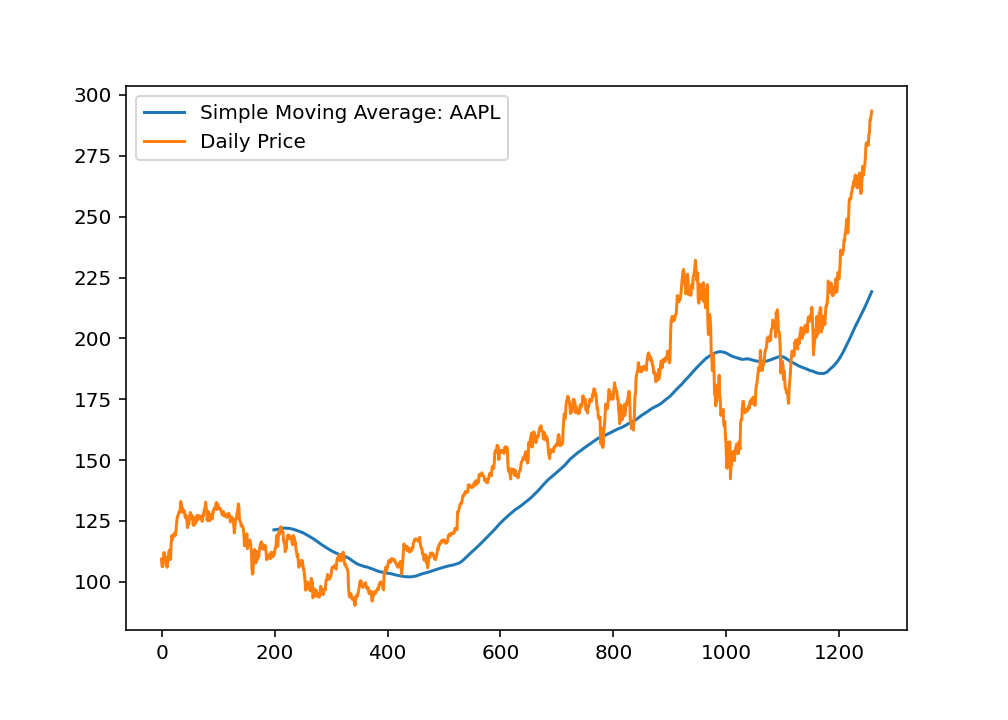
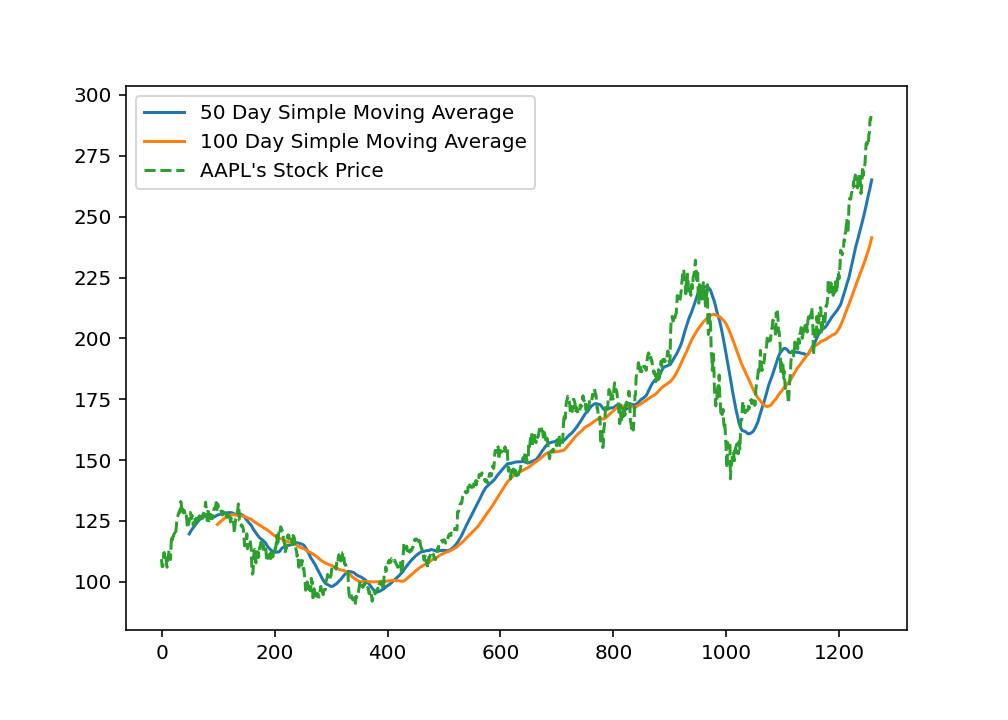

In [66]:
dashboard_title = "Pocket Hedge Fund"

personal_portfolio_analysis = panel.Column(
    "# Personal Poftfolio Analysis",
    daily_portfolio_cumulative_returns.hvplot(title="Daily Portfolio Cumulative Returns", width=1000),
    daily_portfolio_std.hvplot.bar(title="Daily Portfolio Returns Standard Deviation", width=1000),
    portfolio_correlation.hvplot.heatmap(title='Portfolio Stock Correlation', width=1000),
    holding_period_return.hvplot.bar(title='Holding Period Return', width=1000)
)

snp_analysis = panel.Column(
    "# SNP Analysis",
    snp_cum_returns.hvplot(title="SNP Cumulative Returns", rot=90, height=500, width=1000),
    snp_std.hvplot.bar(title="SNP Volatility", rot=90, width=1000),
#     snp_correlation.hvplot.heatmap(title="SNP Correlation", rot=90, height=1000, width=1000)
    
)

simple_moving_average_1 = panel.Column(
    "## Simple Moving Average for Individual Stocks in Your Personal Portfolio",
    sma_200(ticker),
    sma_diff_fun(ticker),
#     sma_diff_plot(ticker='AAPL')
)

simple_moving_average_2 = panel.Column(
    "## Simple Moving Average for Entire Portfolio",
    rolling_avg_plot(ticker, sma50, sma100)
)

valuation_plot = panel.Column(
    "# Apple's Price to Book, Price to Sales and Price to Earning Ratios",
    PB,
    PS,
    PE
)

personal_portfolio_with_risk_preferences = panel.Column(
    "## Based off of your risk preference, here is what we've come up with",
    volatility_preference_analysis(),
    correlation_preference_analysis(),
    sharpe_ratio_preference_analysis(),
    mean_reversion(),
    criteria_for_inclusion()
)

new_portfolio = panel.Column(
    "## Based off of your risk preference, here's what a potential portfolio could look like",
    snp_std[criteria_for_inclusion()].hvplot.bar(title="New Portfolio Volatility", height=500, width=1000),
    snp_cum_returns[criteria_for_inclusion()].hvplot(title="New Portfolio Cumulative Returns", width=1000),
    new_portfolio_correlation.hvplot.heatmap(title="New Portfolio Correlations", width=1000),
#     snp_rolling_avg_df.hvplot(height=400,width=1000)
)

# Create tabs
dashboard = panel.Tabs(
    ("Personal Analysis",personal_portfolio_analysis), 
#     ("SNP Analysis", snp_analysis),
    ("SMA (1)", simple_moving_average_1), 
    ("SMA (2)", simple_moving_average_2),
    ("Valuation", valuation_plot),
    ("Risk Preferences", personal_portfolio_with_risk_preferences),
    ("New Portfolio", new_portfolio)
)


# Create the main dashboard
dashboard

## Serve the Panel Dashboard